# 1. 사전 세팅

In [ ]:
# Warnings 제거
import warnings
warnings.filterwarnings('ignore')

%cd "/content/drive/MyDrive/데이터 분석/projects/ML_protfoilo/3. 부모와 자녀의 IQ 상관 분석"

# 2. 문제 정의

---

    전 세계 많은 부모들은 자녀의 IQ에 대해 궁금해한다.
    심지어 아직 결혼을 하지 않은 사람들까지도 미래 내 자녀들의 IQ에 대해 궁금해한다.
    데이터를 통해 자녀의 IQ와 부모의 IQ의 상관 관계를 분석해보자.

## 2.1. 도메인 지식

---

▸ Cross Validation

    데이터 분석을 함에 있어서 Cross Validation은 반드시 진행되어야하는 것이다.
    데이터를 단순 2등분해서 모델링하게 되면, 데이터가 편향된 상태로 학습이 될 수도 있기에 이는 신뢰할 수 없는 모델이 되어버리고 만다.

▸ 인터넷이 불가한 환경에서의 Cross Validation

    공장은 전용 FA(Factory Automation)망을 사용하는데,
    pip가 안 되는 환경이기 때문에 손으로 직접 Cross Validation 해야하는 상황이 발생할 수도 있다.

▸ 현업에서의 데이터 분석

    수학적인 증명을 할 수 있는 사람보다는 "증거"를 만들어내는 사람이 현업에서는 더 필요한 인재이다.
    모델링은 크게 중요한 것이 아니다.
    현실적인 데이터들로 간단히 모델링해서 검증을 해보니 Fold별로 이런 결과가 나오고,
    샘플링 기법을 어떤 것을 주었을 때, 나타나는 성능의 차이를 경험하는 해보는 것이 중요하다.

▸ 문제란 무엇인가?

    현실과 이상의 차이가 만들어내는 것이 '문제'이다.
    무엇을 하면 값이 좋아지고, 무엇을 해야 이 값의 최적화가 진행되는지에 초점을 두자.
    분석 기법은 목표가 아닌 도구이다.

# 3. 데이터 확인

## 3.1. 데이터 명세

---

    최근 데이터셋이 아닌, 오래된 데이터셋이기 때문에 현대 정서와는 조금 거리가 있을 수 있다.

| Column | Description |
|:----|:----|
| kid_score | 아이의 IQ |
| mom_hs | 엄마의 학력(고졸 여부) |
| mom_iq | 엄마의 IQ |
| mom_work | 엄마의 주당 일하는 날의 수 |
| mom_age | 엄마의 나이 |

## 3.2. 데이터 살펴보기

In [ ]:
import pandas as pd

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

df = pd.read_csv('Data/kidiq.csv')
df.head()

## 3.3. 데이터 가공 명세

---

| 명세 | 내용 |
|:----|:----|
| 가공 범위 | <input type="checkbox" checked> Feature(Column) 변형<br> <input type="checkbox">기간 단위 데이터 분석 및 Big Volume 특성을 반영하기 위한 데이터 증강<br> <input type="checkbox" checked>다양한 Table을 참조하기 위한 데이터 분할|
| 가공 상세 | <b>Feature(Column) 변형</b><br><br>- 모델링에 편차를 반영하기 위해 각 컬럼에 컬럼 값의 평균을 빼는 변형 진행<br><br><b>데이터 분할</b><br><br>- 일반 Validation과 Cross Validation을 위해 데이터를 2등분, 5등분하는 Data Split 진행 |
| 가공 결과 | <b>As is</b><br><br>- row: 434 / column: 5 / table: 1<br><br> <b>To be</b><br><br>- row: 434 / column: 7(+2) / table: 1  |

# 4. 문제 해결 프로세스 정의

---

▸ 문제

    아이의 IQ와 엄마의 IQ에 대한 관심이 높아지고 있다. 정말 둘은 관련이 있을까?
    
▸ 기대 효과

    관련이 있다면, 여러 연구를 진행하는 것에 있어 하나의 정보가 될 수 있다.

▸ 해결 방안

    OLS(Ordinary Least Squares)를 이용한 Regression 방법 적용
    K-fold Cross Validation 적용

▸ 성과 측정

    분석 역량의 증진 (따로 측정하진 않을 예정; 오래된 데이터라 신뢰성이 떨어짐)

# 5. 데이터 전처리 및 EDA

## 5.1. 데이터 전처리

In [ ]:
# 필요한 패키지들 import
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

import patsy
from patsy import dmatrices
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.iolib.summary2 import summary_col

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import r2_score, explained_variance_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV

In [ ]:
df

In [ ]:
print(f'df.shape: {df.shape}')



```
df.shape: (434, 5)
```



In [ ]:
df.info()



```
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 434 entries, 0 to 433
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   kid_score  434 non-null    int64  
 1   mom_hs     434 non-null    int64  
 2   mom_iq     434 non-null    float64
 3   mom_work   434 non-null    int64  
 4   mom_age    434 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 17.1 KB
```



In [ ]:
# target이 null인 데이터 탐색
df[df['kid_score'].isna()].head()

In [ ]:
df = df.dropna()
print(df.isnull().sum().sum())

In [ ]:
df.describe()

In [ ]:
# 추가 컬럼 생성
# 편차 컬럼을 만들어서 평균보다 얼마나 좋고, 안 좋은지를 알아보고자 함
df['mom_iq_c'] = df['mom_iq'] - df['mom_iq'].mean()
df['mom_age_c'] = df['mom_age'] - df['mom_age'].mean()

df.head()

In [ ]:
df.hist(figsize=(21, 8))
plt.show()

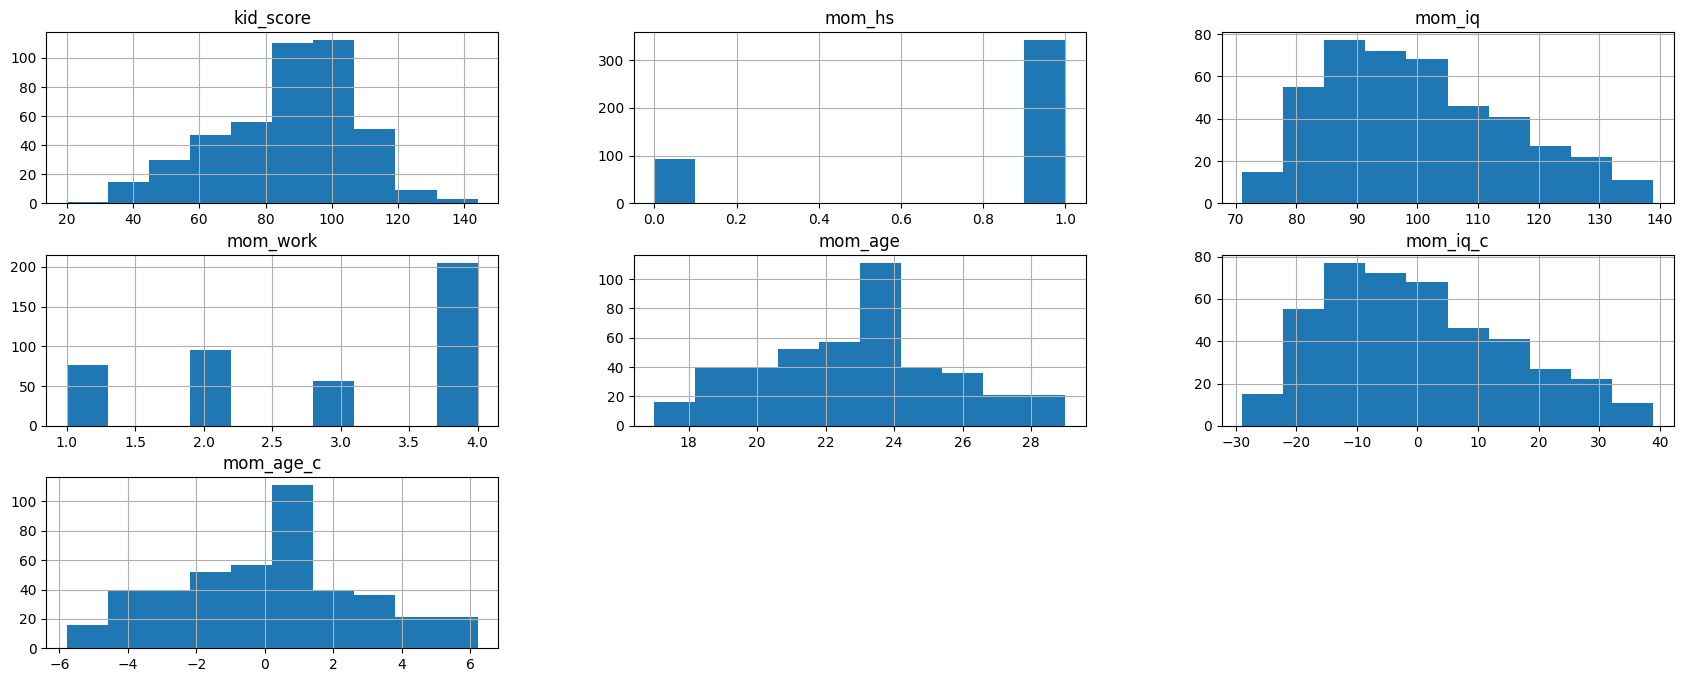

    데이터를 테이블 형태로만 바라보는 것이 아닌, plot과 함께 바라보는 습관을 들여야 한다.

## 5.2. EDA